# 05_1.Independent Sample t-test
- https://pingouin-stats.org/build/html/generated/pingouin.ttest.html#pingouin.ttest

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 런타임 다시 시작

In [ ]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [ ]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [ ]:
ist_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/05_1.IST.csv', encoding="cp949")
ist_df.head()

,회사,수명1,수명2,수명3,수명4,수명5
0,1,50,52,51,50,51
1,1,52,54,53,52,53
2,2,51,51,51,51,51
3,2,52,52,52,52,52
4,1,52,54,53,50,53


### 2.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [ ]:
ist_df['회사'].replace({1:'A타이어', 2:'B타이어',}, inplace=True)
ist_df['회사'] = ist_df['회사'].astype('category')

ist_df.head()

,회사,수명1,수명2,수명3,수명4,수명5
0,A타이어,50,52,51,50,51
1,A타이어,52,54,53,52,53
2,B타이어,51,51,51,51,51
3,B타이어,52,52,52,52,52
4,A타이어,52,54,53,50,53


### 2.3 자료구조 살펴보기

In [ ]:
ist_df.shape

(66, 6)

In [ ]:
ist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   회사      66 non-null     category
 1   수명1     66 non-null     int64   
 2   수명2     66 non-null     int64   
 3   수명3     66 non-null     int64   
 4   수명4     66 non-null     int64   
 5   수명5     66 non-null     int64   
dtypes: category(1), int64(5)
memory usage: 2.9 KB


In [ ]:
ist_df.columns

Index(['회사', '수명1', '수명2', '수명3', '수명4', '수명5'], dtype='object')

## 3.기술통계

In [ ]:
# 그룹별 기술통계
ist_df.groupby('회사')["수명1"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
회사,,,,,,,,
A타이어,31.0,48.94,3.33,42.0,47.0,49.0,51.0,56.0
B타이어,35.0,51.69,3.77,44.0,50.0,52.0,55.0,59.0


In [ ]:
# 분석변수가 여러개 일 때
num_feature = ['수명1', '수명2', '수명3', '수명4', '수명5']
for num in num_feature:
    print("----", num, "----")
    results = ist_df.groupby('회사')[num].describe().round(2)
    print(results, "\n")

---- 수명1 ----
      count   mean   std   min   25%   50%   75%   max
회사                                                    
A타이어   31.0  48.94  3.33  42.0  47.0  49.0  51.0  56.0
B타이어   35.0  51.69  3.77  44.0  50.0  52.0  55.0  59.0 

---- 수명2 ----
      count   mean   std   min   25%   50%   75%   max
회사                                                    
A타이어   31.0  50.94  3.33  44.0  49.0  51.0  53.0  58.0
B타이어   35.0  51.69  3.77  44.0  50.0  52.0  55.0  59.0 

---- 수명3 ----
      count   mean   std   min   25%   50%   75%   max
회사                                                    
A타이어   31.0  50.03  3.19  42.0  48.0  50.0  52.0  57.0
B타이어   35.0  51.69  3.77  44.0  50.0  52.0  55.0  59.0 

---- 수명4 ----
      count   mean   std   min   25%   50%   75%   max
회사                                                    
A타이어   31.0  48.71  1.97  44.0  47.0  49.0  50.0  52.0
B타이어   35.0  51.69  3.77  44.0  50.0  52.0  55.0  59.0 

---- 수명5 ----
      count   mean   std   min   25%   50%

## 4.t-test

### 4.1 차이가 있는 경우(two-sided)

In [ ]:
x = ist_df['수명1'][ist_df['회사'] == 'A타이어']
y = ist_df['수명1'][ist_df['회사'] == 'B타이어']

In [ ]:
# paired = True : paired sample t-test
# correction = False : 등분산일때
pg.ttest(x, y,
         paired = False,
         alternative = "two-sided",
         correction = False).round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.124,64,two-sided,0.003,"[-4.51, -0.99]",0.77,13.517,0.868


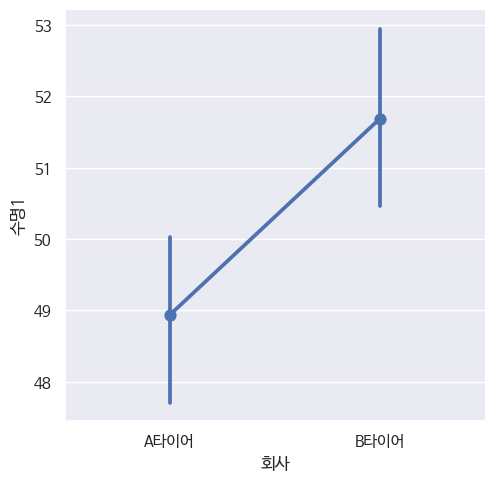

In [ ]:
# 그래프
sns.catplot(x = "회사",
            y = "수명1",
            kind = "point",
            data = ist_df)
plt.show()

### 4.2 차이가 없는 경우

In [ ]:
x = ist_df['수명2'][ist_df['회사'] == 'A타이어']
y = ist_df['수명2'][ist_df['회사'] == 'B타이어']

pg.ttest(x, y,
         paired = False,
         alternative = "two-sided",
         correction = False).round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.852,64,two-sided,0.397,"[-2.51, 1.01]",0.21,0.344,0.134


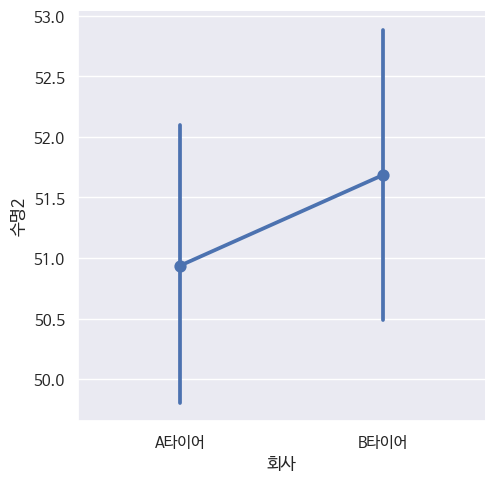

In [ ]:
# 그래프
sns.catplot(x = "회사",
            y = "수명2",
            kind = "point",
            data = ist_df)
plt.show()

### 4.3 양측과 단측 검정 비교(less)

In [ ]:
# two-sided
x = ist_df['수명3'][ist_df['회사'] == 'A타이어']
y = ist_df['수명3'][ist_df['회사'] == 'B타이어']

pg.ttest(x, y,
         paired = False,
         alternative = "two-sided",
         correction = False).round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.91,64,two-sided,0.061,"[-3.38, 0.08]",0.471,1.166,0.469


In [ ]:
# less
pg.ttest(x, y,
         paired = False,
         alternative = "less",
         correction = False).round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.91,64,less,0.03,"[-inf, -0.21]",0.471,2.333,0.597


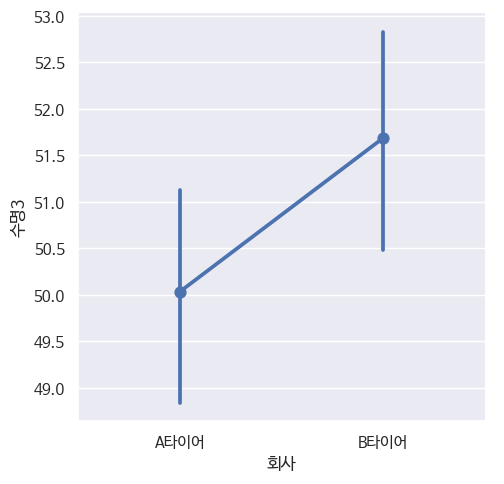

In [ ]:
# 그래프
sns.catplot(x = "회사",
            y = "수명3",
            kind = "point",
            data = ist_df)
plt.show()

## 5.등분산 검정

### 5.1 등분산 검정

In [ ]:
# 등분산이면 지금까지 분석한 것이 문제 없음
pg.homoscedasticity(ist_df,
                    dv = "수명1",
                    group = "회사")

,W,pval,equal_var
levene,0.195988,0.659471,True


In [ ]:
num_feature = ['수명1', '수명2', '수명3', '수명4', '수명5']
for num in num_feature:
    print("----", num, "----")
    results = pg.homoscedasticity(ist_df,
                                  dv = num,
                                  group = "회사")
    print(results, "\n")

---- 수명1 ----
               W      pval  equal_var
levene  0.195988  0.659471       True 

---- 수명2 ----
               W      pval  equal_var
levene  0.195988  0.659471       True 

---- 수명3 ----
               W      pval  equal_var
levene  0.400108  0.529287       True 

---- 수명4 ----
              W      pval  equal_var
levene  7.02041  0.010141      False 

---- 수명5 ----
               W      pval  equal_var
levene  0.072567  0.788502       True 



### 5.2 이분산일때(Welch's test)

In [ ]:
pg.homoscedasticity(ist_df,
                    dv = "수명4",
                    group = "회사")

,W,pval,equal_var
levene,7.02041,0.010141,False


In [ ]:
x = ist_df['수명4'][ist_df['회사'] == 'A타이어']
y = ist_df['수명4'][ist_df['회사'] == 'B타이어']

In [ ]:
# paired = True : paired sample t-test
# correction = True : 이분산일때
pg.ttest(x, y,
         paired = False,
         alternative = "two-sided",
         correction = True).round(3) # 이분산일때

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-4.082,52.522,two-sided,0.0,"[-4.44, -1.51]",0.972,181.419,0.973


In [ ]:
# correction = False : 등분산일때와 비교
pg.ttest(x, y,
         paired = False,
         alternative = "two-sided",
         correction = False).round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-3.941,64,two-sided,0.0,"[-4.48, -1.47]",0.972,119.98,0.973


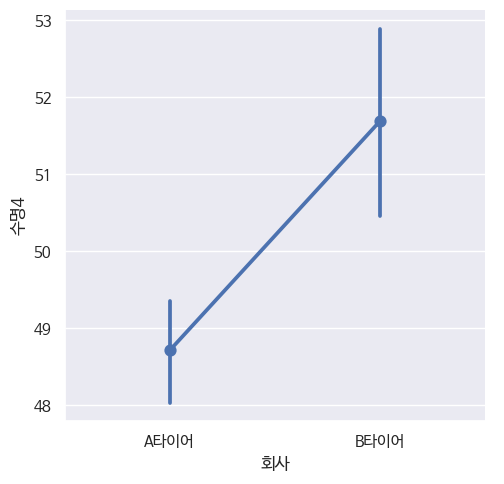

In [ ]:
# 그래프
sns.catplot(x = "회사",
            y = "수명4",
            kind = "point",
            data = ist_df)
plt.show()

## 6.정규성 검정

### 6.1 정규분포 검정

In [ ]:
pg.normality(ist_df,
             dv = '수명1',
             group = '회사')

,W,pval,normal
회사,,,
A타이어,0.976345,0.705439,True
B타이어,0.959988,0.228475,True


In [ ]:
num_feature = ['수명1', '수명2', '수명3', '수명4', '수명5']
for num in num_feature:
    print("----", num, "----")
    results = pg.normality(ist_df,
                           dv = num,
                           group='회사')
    print(results, "\n")

---- 수명1 ----
             W      pval  normal
회사                              
A타이어  0.976345  0.705439    True
B타이어  0.959988  0.228475    True 

---- 수명2 ----
             W      pval  normal
회사                              
A타이어  0.976345  0.705439    True
B타이어  0.959988  0.228475    True 

---- 수명3 ----
             W      pval  normal
회사                              
A타이어  0.977802  0.749155    True
B타이어  0.959988  0.228475    True 

---- 수명4 ----
             W      pval  normal
회사                              
A타이어  0.930326  0.044749   False
B타이어  0.959988  0.228475    True 

---- 수명5 ----
             W      pval  normal
회사                              
A타이어  0.917587  0.020380   False
B타이어  0.914812  0.010135   False 



### 6.2 이상치제거(필요시)

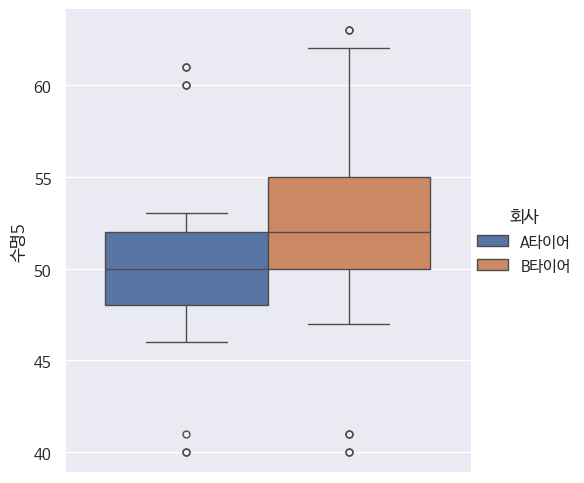

In [ ]:
# 한글 폰트 인식
sns.catplot(data = ist_df,
            y = "수명5",
            hue = "회사",
            kind = "box")
plt.show()

### 6.3 비모수일때

In [ ]:
pg.normality(ist_df,
             dv = '수명5',
             group = '회사')

,W,pval,normal
회사,,,
A타이어,0.917587,0.020380,False
B타이어,0.914812,0.010135,False


In [ ]:
x = ist_df['수명5'][ist_df['회사'] == 'A타이어']
y = ist_df['수명5'][ist_df['회사'] == 'B타이어']

In [ ]:
# Mann-Whitney U test
pg.mwu(x, y,
       alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,434.5,two-sided,0.164555,0.199078,0.400461


In [ ]:
# 모수통계(t-test)와 비교
pg.ttest(x, y,
         paired = False,
         alternative = "two-sided",
         correction = True).round(3)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-0.98,63.948,two-sided,0.331,"[-4.04, 1.38]",0.24,0.38,0.16


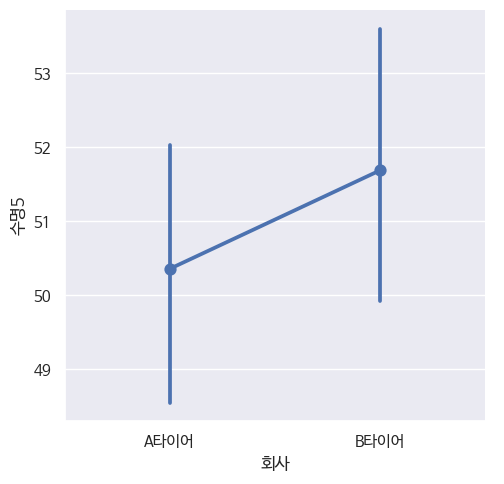

In [ ]:
# 그래프
sns.catplot(x = "회사",
            y = "수명5",
            kind = "point",
            data = ist_df)
plt.show()

## 7.검증결과 그래프

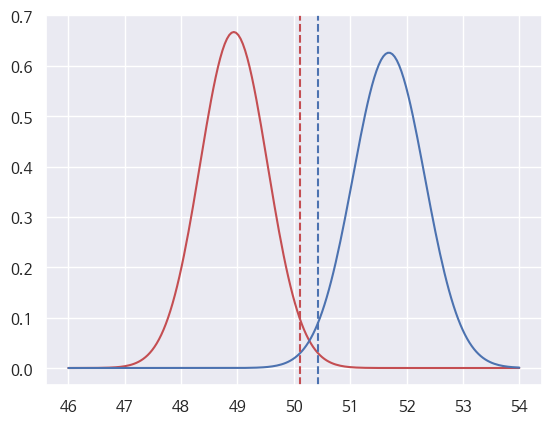

In [ ]:
from scipy.stats import norm # 정규분포

x_data = np.linspace(46, 54, 200)

x1 = 48.935
x2 = 51.686
se1 = 3.33/np.sqrt(31) # 표준오차(표준편차/sqrt(n)))
se2 = 3.77/np.sqrt(35) # 표준오차(표준편차/sqrt(n)))

plt.plot(x_data, norm.pdf(x_data, loc = x1, scale = se1), 'r-')
plt.plot(x_data, norm.pdf(x_data, loc = x2, scale = se2), 'b-')
plt.axvline(x = x1+1.96 * se1, color='r', linestyle='--')
plt.axvline(x = x2-1.96 * se2, color='b', linestyle='--')
plt.show()



```
# 코드로 형식 지정됨
```

## 8.두모집단 비율검정(proportion)

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

count = np.array([87, 671])      # x1, x2
nobs = np.array([2065, 27949])   # n1, n2

z, p = proportions_ztest(count = count,
                         nobs = nobs,
                         value = 0)
print('z : {}, p : {}'.format(z, p))

z : 5.065085626514842, p : 4.0821681951628293e-07


In [ ]:
# chi-square test로 분석한 결과
tab = [count, nobs]
result = sm.stats.Table(tab)
rslt = result.test_nominal_association()
print(rslt)

df          1
pvalue      9.507235974037798e-07
statistic   24.025416827475727
